#### Se importan las bibliotecas necesarias para este proyecto

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#### Imprime los datos históricos de BTC desde un archivo CSV 

In [162]:
ruta_archivo = r"C:\Users\SILCA\OneDrive\Escritorio\dataset\BTC_USD.csv"
df = pd.read_csv(ruta_archivo)

print (df.head())

     Fecha  Precio_Apertura  Precio_Máximo  Precio_Mínimo  Precio_Cierre  \
0  21/3/16        413417999      413417999      410381012      413307007   
1  22/3/16        413131989      418375000      412531006      418088989   
2  23/3/16        418161011      419268005      417364014      418040985   
3  24/3/16        418424011      418679993      415485992      416394012   
4  25/3/16        416507996      418079987      415558014      417177002   

    Volumen  
0  61655400  
1  66813300  
2  61444200  
3  68346704  
4  52560000  


##### Lee e imprime datos del archivo CSV; Creacion de columna de variabilidad, determina la diferencia entre el precio_cierre y el precio_Apertura, da como fresultado, cuanto vario en dolares el precio por dia  

In [163]:
import pandas as pd

ruta_archivo =  'mi_dataframe_BTC.csv'
df = pd.read_csv(ruta_archivo)
df = df.iloc[::-1]  
df['Variabilidad'] = df['Precio_Cierre'] - df['Precio_Apertura']
df = df.iloc[::-1]
print(df)


           Fecha  Precio_Apertura  Precio_Máximo  Precio_Mínimo  \
0     31/12/2015          426.000        433.000        419.000   
1      1/01/2016          431.000        436.000        428.000   
2      2/01/2016          435.000        436.000        432.000   
3      3/01/2016          434.000        434.000        425.000   
4      4/01/2016          430.000        435.000        429.000   
...          ...              ...            ...            ...   
2938  16/01/2024           42.499         43.566         42.086   
2939  17/01/2024           43.132         43.190         42.189   
2940  18/01/2024           42.742         42.876         40.631   
2941  19/01/2024           41.278         42.134         40.297   
2942  21/01/2024           41.671         41.693         41.615   

      Precio_Cierre      Volumen  Variabilidad  Precio_Promedio  
0           431.000     45996600         5.000                1  
1           434.000     36278900         3.000                1

##### Creacion de columna Precio_Promedio, la misma contiene una resta del Precio_Cierre con respecto al Precio_Apertura,  de como resultado 1 si el precio subió y 0 si bajó.

In [164]:
import pandas as pd
df['Precio_Promedio'] = df['Precio_Cierre'] - df['Precio_Apertura']
df['Precio_Promedio'] = df['Precio_Promedio'].apply(lambda x: 1 if x > 0 else 0)
print(df[['Fecha', 'Precio_Cierre', 'Precio_Apertura', 'Precio_Promedio']].head())


        Fecha  Precio_Cierre  Precio_Apertura  Precio_Promedio
0  31/12/2015          431.0            426.0                1
1   1/01/2016          434.0            431.0                1
2   2/01/2016          433.0            435.0                0
3   3/01/2016          430.0            434.0                0
4   4/01/2016          433.0            430.0                1


Eliminacion de valores NAN

In [165]:
df = df.fillna(0)  


##### Se guarda archivo csv, con el nombre, mi_dataframe_BTC  se imprime para verificar que se cargo correctamente.

In [166]:
df.to_csv('mi_dataframe_BTC.csv', index=False)


In [167]:
df_cargado = pd.read_csv('mi_dataframe_BTC.csv')


In [168]:
print(df_cargado)


           Fecha  Precio_Apertura  Precio_Máximo  Precio_Mínimo  \
0     31/12/2015          426.000        433.000        419.000   
1      1/01/2016          431.000        436.000        428.000   
2      2/01/2016          435.000        436.000        432.000   
3      3/01/2016          434.000        434.000        425.000   
4      4/01/2016          430.000        435.000        429.000   
...          ...              ...            ...            ...   
2938  16/01/2024           42.499         43.566         42.086   
2939  17/01/2024           43.132         43.190         42.189   
2940  18/01/2024           42.742         42.876         40.631   
2941  19/01/2024           41.278         42.134         40.297   
2942  21/01/2024           41.671         41.693         41.615   

      Precio_Cierre      Volumen  Variabilidad  Precio_Promedio  
0           431.000     45996600         5.000                1  
1           434.000     36278900         3.000                1

#### Estructura del dataframe

In [169]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2943 entries, 0 to 2942
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fecha            2943 non-null   object 
 1   Precio_Apertura  2943 non-null   float64
 2   Precio_Máximo    2943 non-null   float64
 3   Precio_Mínimo    2943 non-null   float64
 4   Precio_Cierre    2943 non-null   float64
 5   Volumen          2943 non-null   int64  
 6   Variabilidad     2943 non-null   float64
 7   Precio_Promedio  2943 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 184.1+ KB
None



#### Descripcion estadistica basica de las distintas variables del set de datos 
* cantidad 
* media 
* devio standard 
* valor minimo 
* primer cuartil 
* segundo cuartil 
* tercer cuartil 
* valor maximo

In [170]:
df.describe()

,Precio_Apertura,Precio_Máximo,Precio_Mínimo,Precio_Cierre,Volumen,Variabilidad,Precio_Promedio
count,2943.000000,2943.000000,2943.000000,2943.000000,2.943000e+03,2943.000000,2943.000000
mean,99.171573,97.618383,99.612517,99.024176,1.927544e+10,-0.147397,0.525314
std,209.209741,206.252128,209.937064,209.086468,1.926101e+10,59.906575,0.499444
min,1.004000,1.002000,1.002000,1.004000,2.851400e+07,-997.978000,0.000000
25%,7.647500,7.754500,7.522500,7.648500,3.836735e+09,-0.225000,0.000000
50%,19.069000,19.248000,18.721000,19.068000,1.605077e+10,0.011000,1.000000
75%,42.174000,42.664500,41.365000,42.174000,2.979157e+10,0.302000,1.000000
max,999.000000,999.000000,997.000000,999.000000,3.509679e+11,997.996000,1.000000



#### Grafico de barra para mostrar la variabilidad mensual promedio de los 8 años

Mes
1    -0.189250
2    -3.968854
3    -0.052133
4     0.086375
5     0.244895
6     0.488154
7    -0.145190
8    -0.207565
9     0.131454
10    0.491742
11    0.156250
12    0.902333
Name: Variabilidad, dtype: float64


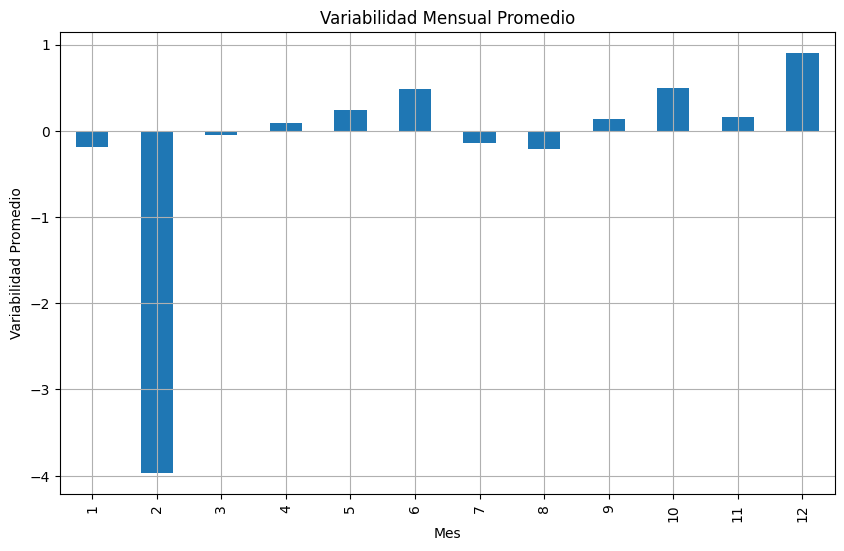

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
df_cargado = pd.read_csv('mi_dataframe_BTC.csv')
df_cargado['Fecha'] = pd.to_datetime(df_cargado['Fecha'], format='%d/%m/%Y')
variabilidad_mensual = df_cargado.groupby(df_cargado['Fecha'].dt.month)['Variabilidad'].mean()
variabilidad_mensual.index = variabilidad_mensual.index.set_names(['Mes'])
print(variabilidad_mensual)
variabilidad_mensual.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Mes')
plt.ylabel('Variabilidad Promedio')
plt.title('Variabilidad Mensual Promedio')
plt.grid(True)
plt.show()


Como tendencia se observa que la variabilidad parece ser más alta al inicio y al final del año, lo que podría estar relacionado con eventos específicos del mercado o ciclos económicos. La mayoría de los meses tienen una variabilidad cercana a cero, lo que sugiere estabilidad en esos períodos.

##### Grafico de barra para la variabilidad mensual del año 2016, teniendo en cuenta que es un año de halving 

Mes
1    -2.096774
2     2.068966
3    -0.677419
4     0.766667
5     2.774194
6     4.233333
7    -1.548387
8    -1.677419
9     1.233333
10    2.903226
11    1.300000
12    6.967742
Name: Variabilidad, dtype: float64


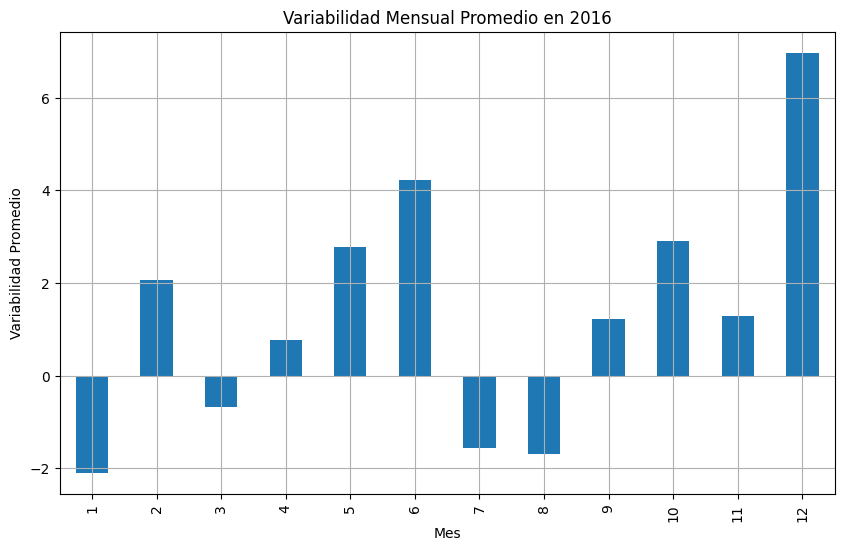

In [172]:
import pandas as pd
import matplotlib.pyplot as plt

df_2016 = df_cargado[df_cargado['Fecha'].dt.year == 2016]
variabilidad_mensual_2016 = df_2016.groupby(df_2016['Fecha'].dt.month)['Variabilidad'].mean()
variabilidad_mensual_2016.index = variabilidad_mensual_2016.index.set_names(['Mes'])
print(variabilidad_mensual_2016)
variabilidad_mensual_2016.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Mes')
plt.ylabel('Variabilidad Promedio')
plt.title('Variabilidad Mensual Promedio en 2016')
plt.grid(True)
plt.show()


 Se observa un patrón de aumento en la variabilidad positiva hacia fin de año. Los meses en los que la variabilidad es baja o negativa podrían indicar una menor volatilidad y potencialmente, precios más bajos, podría ser un buen momento para comprar antes de un posible aumento en el precio. En el gráfico, esto parece ocurrir en los meses 1- 7 y 8.

##### Grafico de barra para la variabilidad mensual del año 2017, teniendo en cuenta que es un año de posthalving 

Mes
1      0.483774
2    -34.779786
3     -0.261516
4      0.008967
5      0.029645
6      0.005733
7      0.010065
8      0.061323
9     -0.012433
10     0.068613
11     0.127500
12     0.119129
Name: Variabilidad, dtype: float64


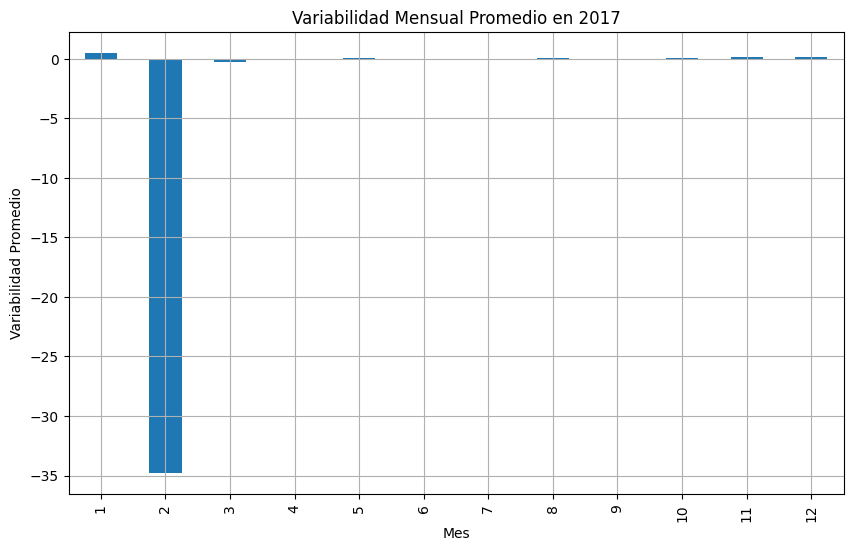

In [173]:
import pandas as pd
import matplotlib.pyplot as plt

df_2017 = df_cargado[df_cargado['Fecha'].dt.year == 2017]
variabilidad_mensual_2017 = df_2017.groupby(df_2017['Fecha'].dt.month)['Variabilidad'].mean()
variabilidad_mensual_2017.index = variabilidad_mensual_2017.index.set_names(['Mes'])
print(variabilidad_mensual_2017)
variabilidad_mensual_2017.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Mes')
plt.ylabel('Variabilidad Promedio')
plt.title('Variabilidad Mensual Promedio en 2017')
plt.grid(True)
plt.show()


En el grafico del año 2017 se observa, que la mayoría de los meses tienen una variabilidad cercana a cero, lo que sugiere estabilidad en esos períodos a lo largo de todo el año, a excepcion del mes 2, donde se observa una variabilidad muy baja lo que indica una caida importante en el precio del BTC.

Mes
1    -0.126581
2     0.009857
3    -0.115935
4     0.070067
5    -0.054161
6    -0.035867
7     0.044774
8    -0.023613
9    -0.012133
10   -0.008839
11   -0.077467
12   -0.008935
Name: Variabilidad, dtype: float64


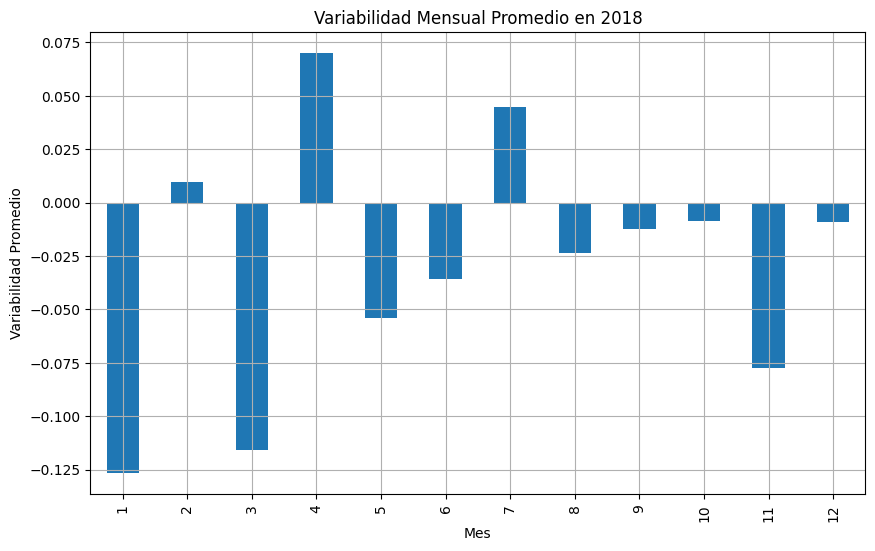

In [174]:
import pandas as pd
import matplotlib.pyplot as plt

df_2018 = df_cargado[df_cargado['Fecha'].dt.year == 2018]
variabilidad_mensual_2018 = df_2018.groupby(df_2018['Fecha'].dt.month)['Variabilidad'].mean()
variabilidad_mensual_2018.index = variabilidad_mensual_2018.index.set_names(['Mes'])
print(variabilidad_mensual_2018)
variabilidad_mensual_2018.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Mes')
plt.ylabel('Variabilidad Promedio')
plt.title('Variabilidad Mensual Promedio en 2018')
plt.grid(True)
plt.show()


Mes
1    -0.008129
2     0.014786
3     0.008226
4     0.041733
5     0.104419
6     0.076367
7    -0.022452
8    -0.014419
9    -0.043967
10    0.029613
11   -0.053467
12   -0.012355
Name: Variabilidad, dtype: float64


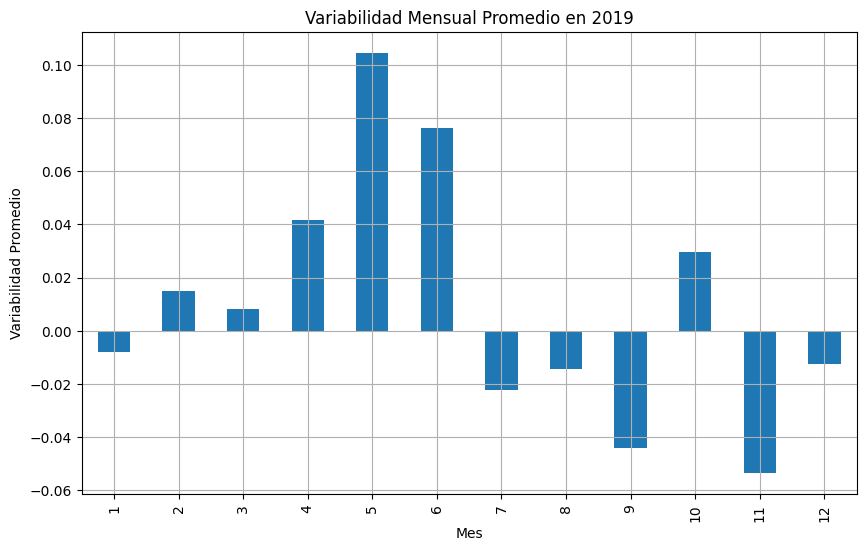

In [175]:
import pandas as pd
import matplotlib.pyplot as plt

df_2019 = df_cargado[df_cargado['Fecha'].dt.year == 2019]
variabilidad_mensual_2019 = df_2019.groupby(df_2019['Fecha'].dt.month)['Variabilidad'].mean()
variabilidad_mensual_2019.index = variabilidad_mensual_2019.index.set_names(['Mes'])
print(variabilidad_mensual_2019)
variabilidad_mensual_2019.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Mes')
plt.ylabel('Variabilidad Promedio')
plt.title('Variabilidad Mensual Promedio en 2019')
plt.grid(True)
plt.show()


##### Grafico de barra para la variabilidad mensual del año 2020, teniendo en cuenta que es un año de halving 

Mes
1     0.070516
2    -0.025586
3    -0.072548
4     0.073900
5     0.025484
6    -0.010500
7     0.070419
8     0.013194
9    -0.029467
10    0.095581
11    0.195567
12    0.302581
Name: Variabilidad, dtype: float64


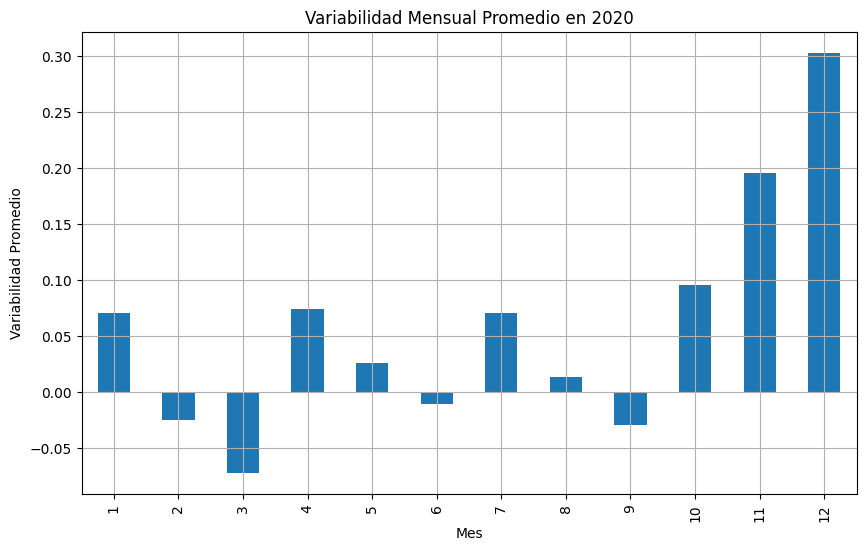

In [176]:
import pandas as pd
import matplotlib.pyplot as plt

df_2020 = df_cargado[df_cargado['Fecha'].dt.year == 2020]
variabilidad_mensual_2020 = df_2020.groupby(df_2020['Fecha'].dt.month)['Variabilidad'].mean()
variabilidad_mensual_2020.index = variabilidad_mensual_2020.index.set_names(['Mes'])
print(variabilidad_mensual_2020)
variabilidad_mensual_2020.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Mes')
plt.ylabel('Variabilidad Promedio')
plt.title('Variabilidad Mensual Promedio en 2020')
plt.grid(True)
plt.show()


 Se observa un patrón de aumento similar al grafico 2016, donde la variabilidad positiva es  hacia fin de año. Los meses en los que la variabilidad es baja o negativa podrían indicar una menor volatilidad y potencialmente, precios más bajos, podría ser un buen momento para comprar antes de un posible aumento en el precio. En el gráfico, esto parece ocurrir en los meses 3 y 9.

##### Grafico de barra para la variabilidad mensual del año 2021, teniendo en cuenta que es un año de posthalving 

Mes
1     0.108613
2     0.431714
3     0.453355
4    -0.044667
5    -0.662452
6    -0.075400
7     0.210806
8     0.192871
9    -0.102100
10    0.567194
11   -0.236033
12   -0.407194
Name: Variabilidad, dtype: float64


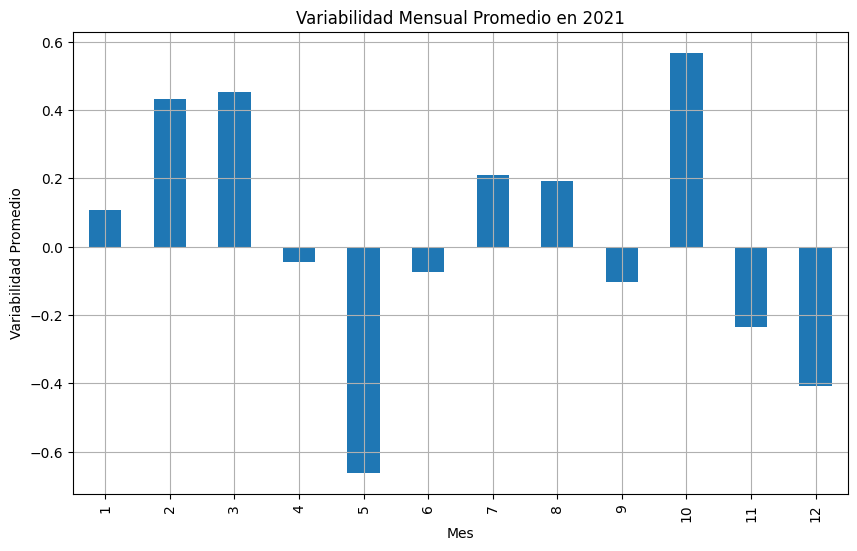

In [177]:
import pandas as pd
import matplotlib.pyplot as plt

df_2021 = df_cargado[df_cargado['Fecha'].dt.year == 2021]
variabilidad_mensual_2021 = df_2021.groupby(df_2021['Fecha'].dt.month)['Variabilidad'].mean()
variabilidad_mensual_2021.index = variabilidad_mensual_2021.index.set_names(['Mes'])
print(variabilidad_mensual_2021)
variabilidad_mensual_2021.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Mes')
plt.ylabel('Variabilidad Promedio')
plt.title('Variabilidad Mensual Promedio en 2021')
plt.grid(True)
plt.show()


En el grafico del año 2021 observamos 6 meses de variabilidad alta, indicando posibles aumentos en los precios o menor volatilidad y 6 meses de variabilidad baja, lo que podría indicar una caída en los precios o un aumento en la volatilidad.

##### Division de datos para el entrenamiento, con el dataframe definitivo

In [178]:
df_cargado = pd.read_csv('mi_dataframe_BTC.csv')

In [179]:
X = df['Precio_Cierre'].values.reshape(-1, 1)
y = df['Precio_Apertura'].values  


#### Seleccion del conjuntos de entrenamiento y prueba 
El 20% de los datos se utilizará como conjunto de prueba (test_size=0.2) y el 80% de los datos para entrenamiento

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Se crea una instancia del modelo, para trabajar con el algoritmo de regresion lineal

In [181]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

#### Entrenamiento del modelo

In [182]:
model.fit(X_train, y_train)



LinearRegression()

#### Predicciones en los datos de prueba

In [183]:

y_pred = model.predict(X_test)



####  Se importan las funciones necesarias para calcular el error cuadrático medio (MSE) y el coeficiente de determinación (R²).

In [184]:
from sklearn.metrics import mean_squared_error, r2_score 
import sklearn.metrics as sm




#### Evalúacion del rendimiento del modelo
El Error Cuadrático Medio (MSE) mide la diferencia entre las predicciones del modelo y los valores reales. Cuanto menor sea el MSE, mejor será el rendimiento del modelo.

In [185]:

print("Error absoluto medio =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Error cuadratico medio =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Error absoluto mediano =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Puntuación de varianza explicada =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("Puntuación R2 =", round(sm.r2_score(y_test, y_pred), 2))

Error absoluto medio = 11.46
Error cuadratico medio = 6560.85
Error absoluto mediano = 2.94
Puntuación de varianza explicada = 0.87
Puntuación R2 = 0.87


#### El Coeficiente de Determinación (R²) indica cuánta varianza en la variable objetivo se explica por el modelo. 
Un valor cercano a 1 significa que el modelo se ajusta bien a los datos.

El Error Cuadrático Medio (MSE):  6560.85
 El MSE mide la diferencia promedio al cuadrado entre los resultados observados reales y los resultados predictivos del  modelo. En este caso como el valor del precio de BTC esta en miles, parece alto pero es aceptable por el tipo de dato, el modelo de prediccion esta funcionando.

El Coeficiente de Determinación (R²):  es 0.87
El R² indica la proporción de la varianza en la variable dependiente que se puede predecir a partir de las variables independientes. Un valor de 0.87  es un ajuste bueno-

Error absoluto medio: es de 11.46 es el promedio de errores absolutos de todos los puntos de datos en el conjunto de datos dado.

Error absoluto mediano: es de 2.94 la mediana de todos los errores en el conjunto de datos dado. La principal ventaja de esta métrica es que es robusta a los valores atípicos.


#### Grafico de Regresion Lineal
Determina los valores reales frente a las predicciones, evalua cómo se ajusta el modelo a los datos.

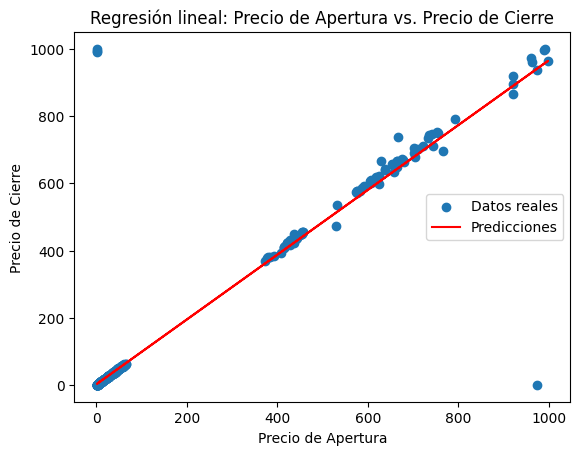

In [186]:
plt.scatter(X_test, y_test, label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Precio de Apertura')
plt.ylabel('Precio de Cierre')  
plt.title('Regresión lineal: Precio de Apertura vs. Precio de Cierre')
plt.legend()
plt.show()


#### Se compara el volumen con el precio de cierre del modelo de regresion lineal.

Los puntos azules representan una combinación de volumen y precio de cierre real. Estos puntos están distribuidos en el gráfico según los datos reales del conjunto de prueba. La línea roja representa las predicciones del modelo de regresión lineal. Esta línea muestra cómo el modelo estima el Precio de apertura en función del precio de cierre. Si los puntos azules están cerca de esta línea, significa que el modelo está haciendo buenas predicciones. Si hay una gran dispersión entre los puntos y la línea, podría ser necesario investigar más o ajustar el modelo.
Hay relación positiva entre el precio de cierre y el precio de apertura. A medida que el precio de cierre aumenta, también lo hace el precio de apertura.

#### Curvas de Aprendizaje 
 Evalua el rendimiento del modelo a medida que aumenta el tamaño del conjunto de entrenamiento, traza la puntuación de entrenamiento y prueba en función del tamaño del conjunto de datos.

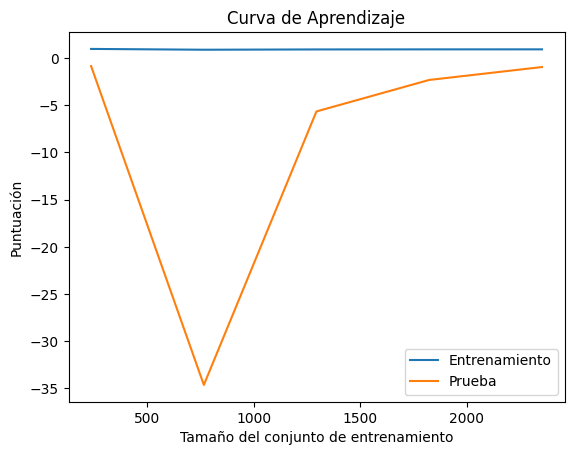

In [187]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Entrenamiento')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Prueba')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Puntuación')
plt.title('Curva de Aprendizaje')
plt.legend()
plt.show()

#### La Curva de Aprendizaje muestra cómo cambia el rendimiento del modelo a medida que aumenta el tamaño del conjunto de entrenamiento. 

* Entrenamiento :
 Esta línea muestra cómo se comporta el modelo en el conjunto de entrenamiento a medida que aumenta el tamaño del conjunto. Inicialmente, la puntuación es alta, pero luego disminuye. Esto puede indicar que el modelo está sobreajustando los datos de entrenamiento.
* Prueba:
La línea naranja comienza baja y aumenta, alcanzando una meseta. Esto indica que el modelo mejora su rendimiento  a medida que se entrena con más datos, pero eventualmente alcanza un punto donde las mejoras adicionales son menores
* Tamaño del conjunto de entrenamiento (eje horizontal):
 Representa el número de ejemplos de entrenamiento utilizados para entrenar un modelo. Comienza en 0 y aumenta hasta 2000.
* Puntuación (eje vertical):
 La puntuación generalmente se refiere al rendimiento del modelo. En este caso, parece estar en una escala negativa, lo que sugiere que se trata de una métrica de error. Cuanto más cerca de 0, mejor.


#### Histograma de Residuos 
Analiza la distribución de los residuos, la diferencia entre los valores reales y las predicciones

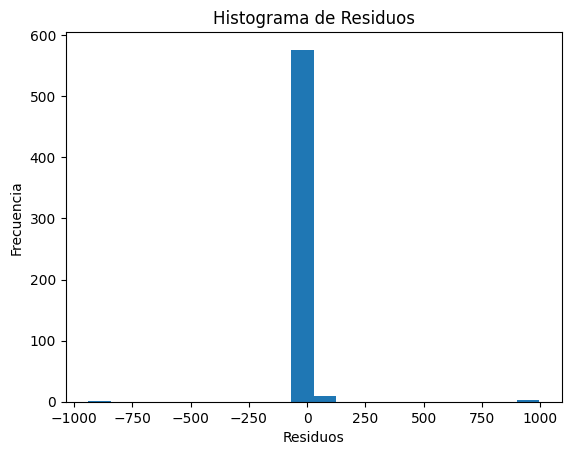

In [188]:
residuals = y_test - y_pred
plt.hist(residuals, bins=20)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.show()


Eje horizontal (X) Etiquetado como Residuos y abarca desde -1000 hasta 1000.
Eje vertical (Y) Etiquetado como Frecuencia y varía de 0 a 600.
Observaciones: La barra azul prominente en el valor 0 del eje horizontal, con una frecuencia de más de 500, sugiere que los residuos del conjunto de datos están fuertemente centrados alrededor de cero.
Esto podría indicar un buen ajuste del modelo estadístico, del modelo.

#### Reemplazo de variables, fecha_apertura por volumen, para verificafar correlacion

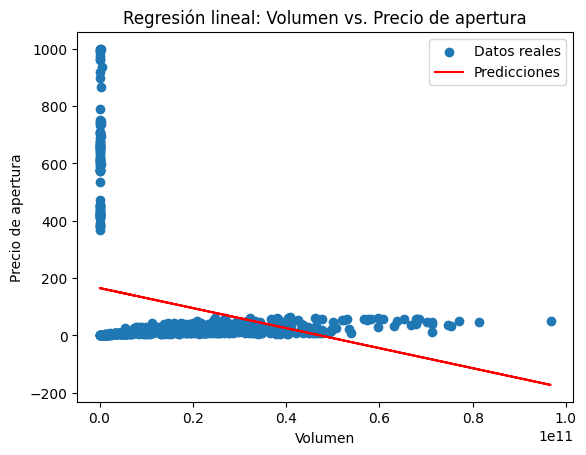

In [189]:


X = df['Volumen'].values.reshape(-1, 1)
y = df['Precio_Apertura'].values  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.scatter(X_test, y_test, label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Volumen')
plt.ylabel('Precio de apertura') 
plt.title('Regresión lineal: Volumen vs. Precio de apertura')
plt.legend()
plt.show()


##### Se comparan las predicciones del modelo de regresión lineal con los valores reales para la variable “Volumen” frente al “Precio de Apertura”. 
Volumen: En el eje horizontal, tenemos el volumen de operaciones (compra y venta) de Bitcoin. Representa la cantidad total de BTC negociados en un período de tiempo específico.
Precio de apertura: En el eje vertical, tenemos el precio de apertura de Bitcoin en ese mismo período. Es el precio al que se iniciaron las operaciones en ese intervalo de tiempo.
Datos reales (puntos azules): Cada punto azul representa una observación real de volumen y precio de apertura. Estos datos provienen del histórico de operaciones de Bitcoin.
Línea de predicciones (línea roja): La línea roja es el resultado de aplicar un modelo de regresión lineal a los datos. Esta línea representa la relación estimada entre el volumen y el precio de apertura. Arrojo una correlacion negativa.

#### Grafico de Barras de ganancias mensuales por año
Calcula las ganancias mensuales Precio_Cierre - Precio_Apertura. Agrupa por año y mes, y suma las ganancias. Desglosa el índice de la agrupacióncion. Crea el grafico



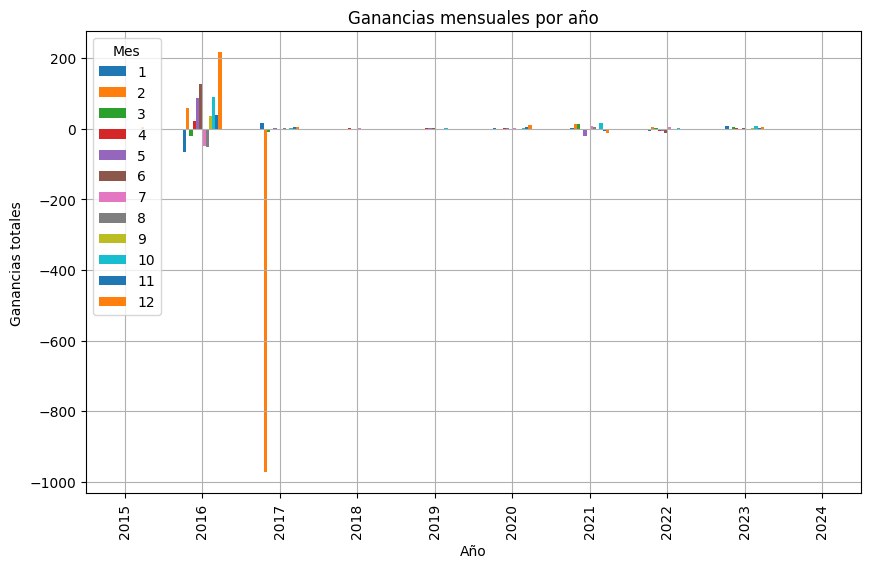

In [190]:
import pandas as pd
import matplotlib.pyplot as plt
df_cargado = pd.read_csv('mi_dataframe_BTC.csv')
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')
df['Ganancia'] = df['Precio_Cierre'] - df['Precio_Apertura']
ganancias_por_mes = df.groupby([df['Fecha'].dt.year, df['Fecha'].dt.month])['Ganancia'].sum()
ganancias_por_mes.index = ganancias_por_mes.index.set_names(['Año', 'Mes'])
ganancias_por_mes.unstack().plot(kind='bar', figsize=(10, 6))
plt.xlabel('Año')
plt.ylabel('Ganancias totales')
plt.title('Ganancias mensuales por año')
plt.grid(True)
plt.legend(title='Mes', loc='upper left')
plt.show()


El gráfico muestra las ganancias mensuales por año desde 2015 hasta 2024. Aquí hay algunos puntos clave:

Variabilidad: Hay una notable variabilidad en las ganancias mensuales a lo largo de los años. Algunos años, como 2016 y 2017, muestran pérdidas significativas en varios meses.
Estabilidad: A partir de 2018, las ganancias parecen ser más estables, con menos fluctuaciones extremas.
Meses Destacados: Algunos meses, como enero y diciembre, parecen tener ganancias más consistentes en comparación con otros meses.
Tendencias Generales: Aunque hay fluctuaciones, parece haber una tendencia general de recuperación y estabilidad en las ganancias a partir de 2018.
Este análisis ayuda a identificar patrones para futuras inversiones